In [35]:
#Importing required libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
#Taking into account just one feature(sqft_living) to make prediction on house prices
#For the sake of implementing simple linear regression
dataset=[]

for i in tqdm(range(df.shape[0])):
    dataset.append([list(df['sqft_living'])[i],list(df['price'])[i]])
    
#Below is a dummy dataset.You can use it to have an easier understanding.
'''
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
'''
X = [row[0] for row in dataset]
Y = [row[1] for row in dataset]
X=np.array(X)
Y=np.array(Y)
plt.scatter(X,Y,color='red')

 96%|████████████████████████████████████████████████████████████████████████▎  | 20850/21613 [01:40<00:03, 223.55it/s]

In [41]:
#Splitting the dataset

from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(X , Y , test_size=1/6 , random_state=0)


In [42]:
def makePrediction(X,Y,ERROR):
    b0,b1 = calculate_coeff(X,Y)
    yPred = b0 + b1*X
    error = ERROR(yPred , Y)
    return yPred,error,b0,b1

In [43]:
def calculate_coeff(x,y):
    b1 = np.divide( cov(x,y) , var(x) )
    b0 = mean(y) - b1*mean(x)
    return b0,b1

In [44]:
def mean(variable):
    return np.mean(variable)

In [45]:
def var(variable):
    variance = np.sum( (variable-mean(variable))**2 )
    return variance

In [46]:
def cov(x,y):
    covariance =  np.sum( (x-mean(x))*(y-mean(y)) )
    return covariance

In [47]:
def rmse(y_pred,y_actual):
    error=np.abs(y_pred - y_actual)
    mean_error=np.mean(error)
    return sqrt(mean_error)

In [48]:
predictions , errorRMSE , b0, b1 = makePrediction(xtrain, ytrain , rmse)

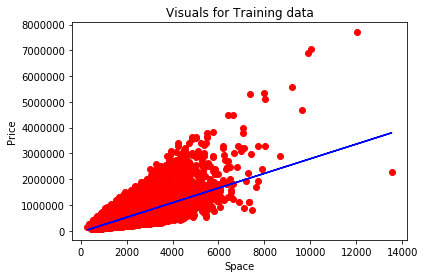

Root mean square error: 418.9333789262082


In [49]:
#Visualizing the training set results
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,predictions,color='blue')
plt.xlabel('Space')
plt.ylabel('Price')
plt.title('Visuals for Training data')
plt.show()
print('Root mean square error:',errorRMSE)

In [58]:
#Making predictions for test data
predictionsTest = b0 + b1*xtest
errorRMSEtest = rmse(predictionsTest,ytest)

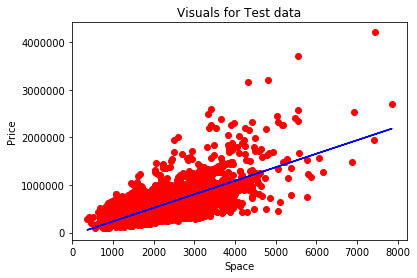

Root mean square error: 411.38154530434883


In [59]:
#Visualizing the Test set results
plt.scatter(xtest,ytest,color='red')
plt.plot(xtest,predictionsTest,color='blue')
plt.xlabel('Space')
plt.ylabel('Price')
plt.title('Visuals for Test data')
plt.show()
print('Root mean square error:',errorRMSEtest)

<h2>You may be thinking:Why is the error large?Your answer is,</h2>
<p>It happened because we made predictions based on a single feature on which the house price depends(for the sake of implementing <b>Simple Linear Regression</b>), while the house price depends on many other features.</p>